In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
df = pd.read_excel('C:\\Users\\USER\\Downloads\\Claims Data.xlsx')

In [3]:
#shape of the df
df.shape

(5000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   S/N                             5000 non-null   int64         
 1   AGE                             5000 non-null   int64         
 2   SEX                             5000 non-null   object        
 3   PLAN                            5000 non-null   object        
 4   COMPANY                         5000 non-null   object        
 5   PROVIDER NAME                   5000 non-null   object        
 6   PATIENT ENCOUNTER DATE          5000 non-null   datetime64[ns]
 7   MEDICAL CLAIMS SUBMISSION DATE  5000 non-null   datetime64[ns]
 8   PAYMENT DATE                    5000 non-null   datetime64[ns]
 9   SERVICE TYPE                    5000 non-null   object        
 10  DIAGNOSIS                       5000 non-null   object        
 11  TOTA

In [5]:
#I like to take all column names to lower case and replace spaces with underscore so I can do dot notations
headers = [line.lower().replace(' ', '_') for line in df.columns]
df.columns = headers
df.head(1)

,s/n,age,sex,plan,company,provider_name,patient_encounter_date,medical_claims_submission_date,payment_date,service_type,diagnosis,total_price
0,1,29,M,RED Individual,CORPORATE,JOY HOSPITAL-LAGOS,1997-12-12,1998-01-02,1998-01-02,Outpatient,ACUTE MALARIA WITH URTI,17000.0


In [6]:
#drop the extra serial no
del df['s/n']
df.shape

(5000, 11)

In [7]:
df.plan.sample(10)

1784             RED Individual
4202              Yellow Family
2702                 RED Family
3500                 RED Family
2264    MALTA RED PLAN (Family)
1711          Yellow Individual
3167           GREEN Individual
2009                 RED Family
2985             RED Individual
3767               GREEN Family
Name: plan, dtype: object

In [8]:
#Get the unique plan category from the myriad versions of each.
#This is done by eyeballing this column and seeing the base of the plan names and isolating them
#eg 'MAT RED (1 Spouse, 1 child)' == MAT RED
df['plan_cat'] = df.plan.apply(lambda x: ' '.join(x.split()[:2]).split('(')[0])

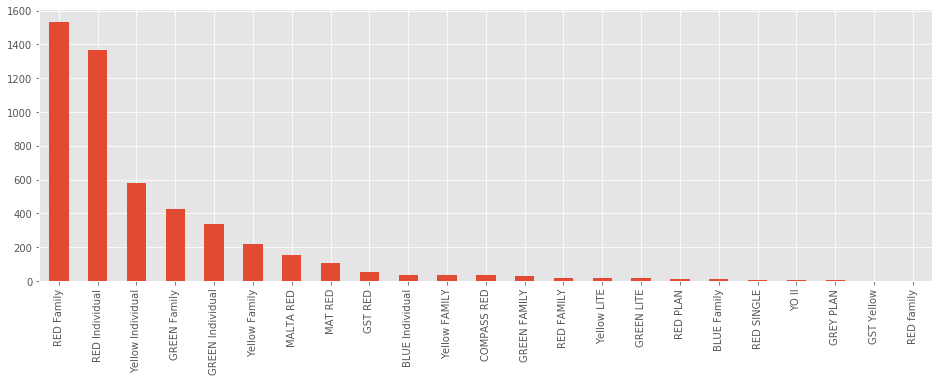

In [9]:
df.plan_cat.value_counts().plot(kind='bar', figsize=(16,5))

Text(0.5, 1.0, 'Total Amount Grossed by each Plan')

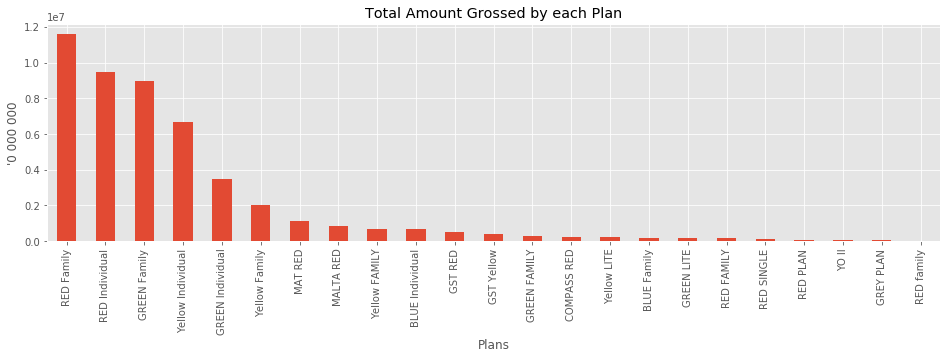

In [10]:
ax = df.groupby(['plan_cat']).total_price.sum().sort_values(ascending=False).plot.bar(figsize=(16,4))
ax.set_ylabel("'0 000 000")
ax.set_xlabel("Plans")
ax.set_title("Total Amount Grossed by each Plan")

Text(0.5, 1.0, 'Mean Amount Grossed by each Plan')

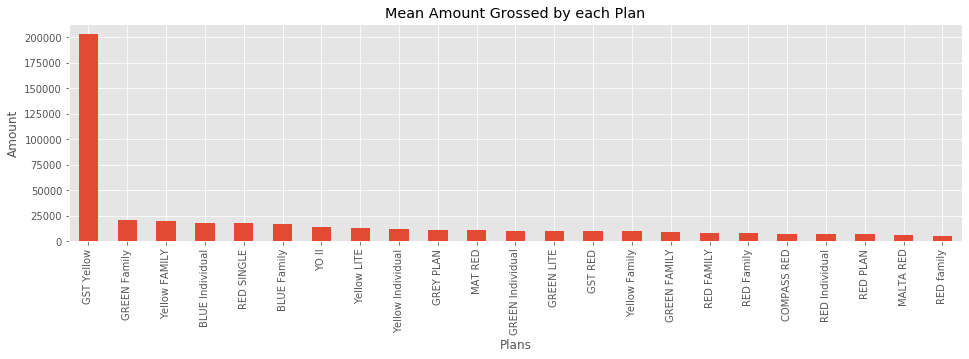

In [11]:
ax = df.groupby(['plan_cat']).total_price.mean().sort_values(ascending=False).plot.bar(figsize=(16,4))
ax.set_ylabel("Amount")
ax.set_xlabel("Plans")
ax.set_title("Mean Amount Grossed by each Plan")

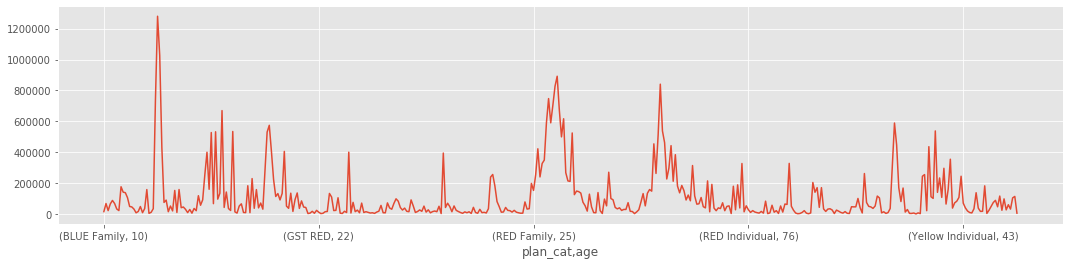

In [12]:
#Relationship between plan category and age by total amount paid
df.groupby(['plan_cat', 'age']).total_price.sum().plot(figsize=(18,4))

### Most Common Plan Among Retail Users

RED Individual       611
Yellow Individual    404
Name: plan, dtype: int64


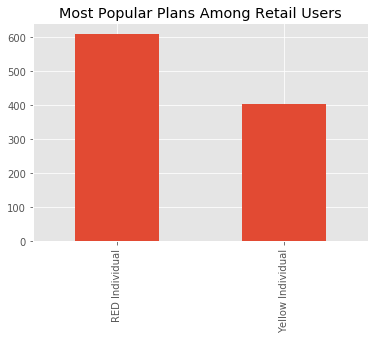

In [13]:
#Get retial users only
retail_users = df[df['company'] == 'RETAIL']
#Most common plan in this category
counts = retail_users.plan.value_counts()
print(counts)
retail_users.plan.value_counts().plot(kind='bar', title='Most Popular Plans Among Retail Users')

In [14]:
red_ind_male = retail_users[(retail_users['plan'] == 'RED Individual') & (retail_users['sex'] == 'M')]
red_ind_female = retail_users[(retail_users['plan'] == 'RED Individual') & (retail_users['sex'] == 'F')]

yellow_ind_male = retail_users[(retail_users['plan'] == 'Yellow Individual') & (retail_users['sex'] == 'M')]
yellow_ind_female = retail_users[(retail_users['plan'] == 'Yellow Individual') & (retail_users['sex'] == 'F')]

print(f"There {len(retail_users):,} retail users.\nOf these {counts.keys()[0]} has {counts.values[0]} users\nAnd {counts.keys()[1]} has {counts.values[1]}" )
print(f"Of the {counts.keys()[0]}, {len(red_ind_male)} are male and {len(red_ind_female)} are female.")
print(f"Of the {counts.keys()[1]}, {len(yellow_ind_male)} are male and {len(yellow_ind_female)} are female.")

There 1,015 retail users.
Of these RED Individual has 611 users
And Yellow Individual has 404
Of the RED Individual, 257 are male and 354 are female.
Of the Yellow Individual, 177 are male and 227 are female.


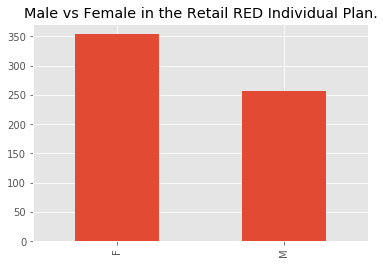

In [15]:
retail_users[retail_users['plan'] =='RED Individual']['sex'].value_counts().plot(kind='bar',
                                                                                 title= 'Male vs Female in the Retail RED Individual Plan.')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


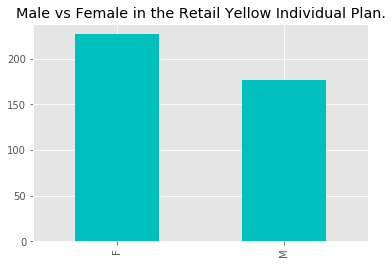

In [16]:
retail_users[retail_users['plan'] =='Yellow Individual']['sex'].value_counts().plot(kind='bar', color = 'C',
                                                                                 title= 'Male vs Female in the Retail Yellow Individual Plan.')